In [2]:
import re
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib as mp
import Parser

In [3]:
r = requests.get('https://cbr.ru/currency_base/dynamics/?UniDbQuery.Posted=True&UniDbQuery.so=1&UniDbQuery.mode=1&UniDbQuery.date_req1=&UniDbQuery.date_req2=&UniDbQuery.VAL_NM_RQ=R01235&UniDbQuery.From=01.01.1992&UniDbQuery.To=08.09.2023')

In [4]:
b = bs(r.text, 'html.parser')

In [5]:
t = b.table

In [6]:
x = [i for i in t.stripped_strings][5:]

In [7]:
d = {'Date':[v for n,v in enumerate(x) if n % 3 == 0], 'Rate':[x[n+2] for n,v in enumerate(x) if n % 3 == 0]}

In [8]:
data = pd.DataFrame(data=d)

In [9]:
data

,Date,Rate
0,08.09.2023,"98,1961"
1,07.09.2023,"97,8439"
2,06.09.2023,"97,5383"
3,05.09.2023,"96,6199"
4,02.09.2023,"96,3411"
...,...,...
7168,15.07.1992,"130,2000"
7169,10.07.1992,"130,3000"
7170,08.07.1992,"130,5000"
7171,03.07.1992,"134,8000"


In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y', dayfirst=True)
data['Rate'] = data['Rate'].str.replace(',', '.')
data['Rate'] = data['Rate'].str.replace(' ', '')
data['Rate'] = pd.to_numeric(data['Rate']) 

In [11]:
m = data.set_index('Date').groupby(pd.Grouper(freq='MS')).mean()

<Axes: xlabel='Date'>

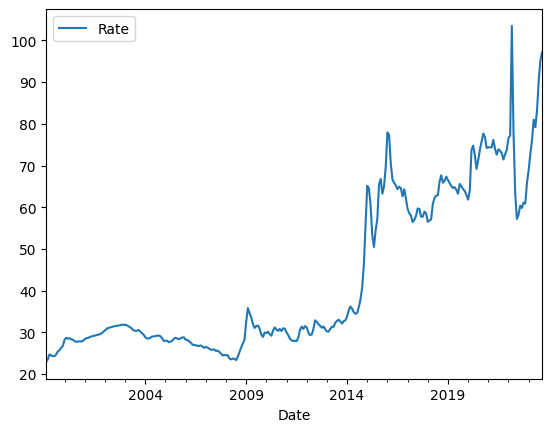

In [12]:
m[m.index > '01/01/1999'].plot()

<Axes: xlabel='Date'>

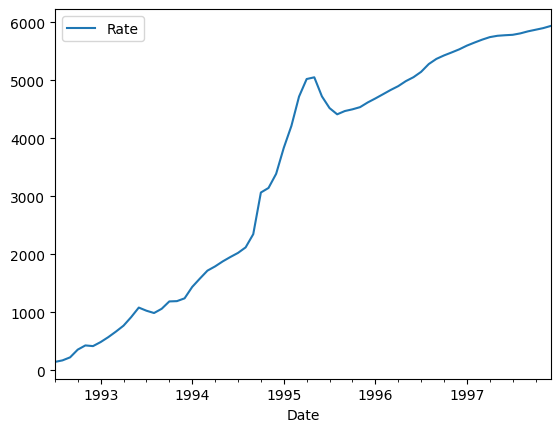

In [13]:
m[m.index < '01/01/1998'].plot()

***

In [14]:
import Parser
p = Parser.client()

In [15]:
url = 'https://economy.gov.ru/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/?type=&page='
url2 = 'https://economy.gov.ru'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://economy.gov.ru/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/',
    'DNT': '1',
    'Connection': 'keep-alive',
    # Requests sorts cookies= alphabetically
    # 'Cookie': 'session-cookie=17839a0e4a73358f75e0135eb4819f5bdfa917d513e526a3b5ffd28692550f32348af4815844d2d8fe0fd5037681b0e1; sp_test=1; sputnik_session=1694367273721|2; PHPSESSID=c3uvu7g1702pftlba6ku2g7rvh',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Sec-GPC': '1',
}


In [16]:
#: Парсинг отдельных динамичесих элементов на странице

dates = []
prices = []
pat_dt = re.compile('(?P<date>\w* \d{4})')
pat_price = re.compile('(?P<usd>\d{1,3},\d{1,2})')

for counts in range(1, 5):
    resp = p.session.get(url=url+str(counts), headers=headers)

    data = bs(resp.text, 'html.parser')

    for i in data.find_all('a', attrs={'title':re.compile(u'Юралс')}):
        link = i['href']
        print(link)

        raw = p.session.get(url=url2+link, headers=headers)
        html_data = bs(raw.text, 'html.parser')

        txt = html_data.get_text(strip=True)

        dt = re.findall(pat_dt, txt)[1]
        dates.append(dt)

        pr = re.findall(pat_price, txt)[0]
        prices.append(pr)

print(dates)
print(prices)


        

/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_avgust_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_iyul_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_iyun_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_may_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_aprel_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_mart_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_fevral_2023_goda.html
/material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_yanvar_2023_goda.html
/material/departments/d12/

In [17]:
raw = p.session.get(url=url2+'material/departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_avgust_2023_goda.html', headers=headers)

html_data = bs(raw.text, 'html.parser')

ConnectionError: SOCKSHTTPSConnectionPool(host='economy.gov.rumaterial', port=443): Max retries exceeded with url: /departments/d12/konyunktura_mirovyh_tovarnyh_rynkov/o_sredney_cene_na_neft_sorta_yurals_za_avgust_2023_goda.html (Caused by NewConnectionError('<urllib3.contrib.socks.SOCKSHTTPSConnection object at 0x7f1328c5c990>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [ ]:
for i in html_data.find_all('p', string=re.compile('\d{1,3},\d{1,3} долл')):
    print (i)

for d in html_data.find_all(string=re.compile('\w{1} \d{4} года')):
    print(d)


In [ ]:
txt = html_data.get_text(strip=True)

pat_dt = re.compile('(?P<date>\w* \d{4})')
pat_price = re.compile('(?P<usd>\d{1,3},\d{1,2})')

print(re.findall(pat_dt, txt)[1])
print(re.findall(pat_price, txt)[0])

***

In [ ]:
import datetime

In [ ]:
# проверка даты
fmt = '%d.%m.%Y'

In [ ]:
datetime.datetime.strftime(datetime.datetime.now(), '%d.%m.%Y')

In [ ]:
datetime.datetime.strptime('01.06.2022', fmt)

In [ ]:
datetime.datetime.strptime('January 2023', '%B %Y')

In [ ]:
#Блок для переименования месяцев в номера
for item in list():
    for old, new in [('январь', '01'), ('февраль', '02'), ('март', '03'), ('апрель', '04'), ('май', '05'), ('июнь', '06'), ('июль', '07'), ('август','08'), ('сентябрь', '09'), ('октябрь', '10'), ('ноябрь', '11'), ('декабрь', '12')]:
        if old in item:
            item.replace(old, new)

In [ ]:
datetime.datetime.strftime(datetime.datetime.now(), '%d-%B-%Y')

In [ ]:
def test(st):
    
    pat = r'\b(0[1-9]|[1-2]\d|3[0-1])\.(0[1-9]|1[0-2])\.\d{4}\b'
    d = re.fullmatch(pat, st)
    if not d:
        print('not ok') 

In [ ]:
test('32.09.2023')


***

In [ ]:
url = 'https://fas.gov.ru/pages/pokazateli-dla-vycheta-akciza'
r = requests.get(url)
d = bs(r.text, 'html.parser')

In [ ]:
t = [x for x in d.find_all('table')]

In [ ]:
str(t[0])

In [ ]:
dfs = []
for i in t:
    m = pd.read_html(str(i), flavor='lxml')
    dfs.append(pd.concat(m, axis=1))

In [ ]:
dfs[4].ffill(axis=1)

In [ ]:
dfs[]

***

In [47]:
m = Parser.client()
r = m.session.get('https://spimex.com/indexes/service_functions_oil.php?request=graph&code=reg&index=eti&market=P&litre=0&subcode=evr')

In [48]:
import io
csv = io.StringIO(r.text)

In [49]:
a = pd.read_csv(csv, delimiter=';')

In [50]:
a['date'] = pd.to_datetime(a['date'], format='%Y-%m-%d', dayfirst=True)
a['regular-92'] = a['value']
a = a[['date', 'value']]

In [51]:
gr = (a.set_index('date')
      .groupby(pd.Grouper(freq='MS'))
      .mean()
      .round()
      .sort_index(ascending=False))

In [24]:
gr.iloc[0]

regular-92    66732.0
Name: 2023-09-01 00:00:00, dtype: float64

In [52]:
dt_all = ['dtl', 'dtm', 'dtz']

l = []
for ind in dt_all:
    r = m.session.get(f'https://spimex.com/indexes/service_functions_oil.php?request=graph&code={ind}&index=eti&market=P&litre=0&subcode=evr')
    csv = io.StringIO(r.text)
    dt = pd.read_csv(csv, delimiter=';')
    dt['date'] = pd.to_datetime(dt['date'], format='%Y-%m-%d', dayfirst=True)
    dt['disel'] = dt['value']
    dt = dt[['date', 'value']]
    l.append(dt)

In [53]:
dt_full = pd.concat(l)

In [54]:
diz = (dt_full.set_index('date')
       .groupby(pd.Grouper(freq='MS'))
       .mean()
       .round()
       .sort_index(ascending=False))

In [11]:
diz

,disel
date,
2023-09-01,70029.0
2023-08-01,64327.0
2023-07-01,54208.0
2023-06-01,51186.0
2023-05-01,50847.0
...,...
2016-06-01,NaN
2016-05-01,NaN
2016-04-01,NaN


In [55]:
md = gr.merge(diz, left_index=True, right_index=True, how='inner', suffixes=('_reg92', '_disel'))

In [56]:
md

,valuereg92_,valuedisel_
date,,
2023-09-01,66732.0,70029.0
2023-08-01,62527.0,64327.0
2023-07-01,60820.0,54208.0
2023-06-01,56537.0,51186.0
2023-05-01,52223.0,50847.0
...,...,...
2016-06-01,NaN,NaN
2016-05-01,NaN,NaN
2016-04-01,NaN,NaN


In [29]:
md.to_excel('data/reg_92_dt.xlsx')

In [30]:
d = {'Котировка':[md.columns[0], md.columns[1]], 'Среднее':[md.iloc[0,0], md.iloc[0,1]], 'Норматив':[56900, 53850], 'Лимит':[0.1, 0.2]}

In [31]:
dx = pd.DataFrame(d)

In [32]:
dx['max'] = dx['Норматив'] * dx['Лимит'] + dx['Норматив']
dx['Отклонение от норматива, %'] = ((dx['Среднее'] - dx['Норматив'])/dx['Норматив'] * 100).round(2)
dx['Дельта'] = dx['Среднее'] - dx['max'] 

In [33]:
dx

,Котировка,Среднее,Норматив,Лимит,max,"Отклонение от норматива, %",Дельта
0,regular-92,66732.0,56900,0.1,62590.0,17.28,4142.0
1,disel,70029.0,53850,0.2,64620.0,30.04,5409.0


In [34]:
tb = dx.to_html()

mes = Parser.sender()
r = mes.create_message(htmlstr=tb, filename='reg_92_dt.xlsx')

[email-sender]: reg_92_dt.xlsx добавлен во вложениe


In [35]:
r['To']
mes.smtp_to

['abrosimov.ov@gazprom-neft.ru', 'afterpati@ya.ru']

In [36]:
mes.send_message(r)

[email-sender]: Выгрузка отправлено на адрес ['abrosimov.ov@gazprom-neft.ru', 'afterpati@ya.ru']
